In [2]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 201 #Length of state
kappa = 5.7 #Similarity weight

#Activation probability when bundling one active and one inactive neuron,
#i.e. 1+0 = {0 with probability p, 1 with probability 1-p}.
p = 0.5 

In [3]:
def ham_dist(A,B):
    #Calculate number of positions with different bits
    
    return np.sum(np.abs(A-B))

def similarity(d):
    
    return np.exp(-kappa*binom.cdf(d,N,1/2))
        
def bundle(x,y):
    '''Bundle arrays element-wise'''
    return (x == y)*x + (x != y)*np.random.binomial(1,p,N)
    
def bind(x,y):
    '''Bind arrays element-wise'''
    return (x == y)*1

def left_bundle(mem_list):
    '''Left bundle a memory list (recency)'''
    
    L = mem_list[0] #start bundling with initial state in list
    for j in range(1,len(mem_list)):
        L = bundle(L,mem_list[j])
        
    return L

def right_bundle(mem_list):
    '''Right bundle a memory list (primacy)'''
    track = [0,1,2,3,4,5,6,7]
    R = mem_list[-1] #start bundling with final state in list

    for j in range(2,len(mem_list)+1):

        R = bundle(R,mem_list[-j])
    
    return R

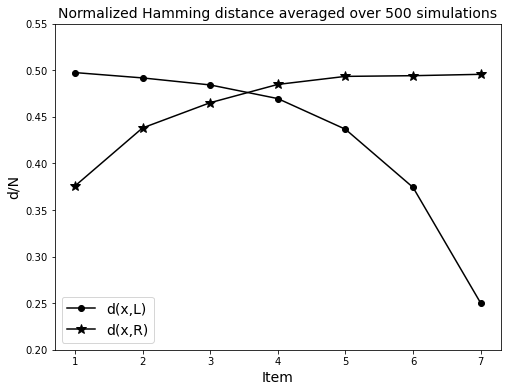

In [11]:
def LRdistance_profile(num_items):

    q = 0.5 #Mean neuron activation probability
    mem_list = [np.zeros(N,dtype=np.int64)] #Initialize with empty state

    for j in range(num_items):
        mem_list.append(np.random.binomial(1,q,N))
    
    ldist, rdist = [], []
    L, R = left_bundle(mem_list), right_bundle(mem_list)
    for j in range(1,len(mem_list)):

        ldist.append(ham_dist(L,mem_list[j]))
        rdist.append(ham_dist(R,mem_list[j]))
        
    return np.array(ldist), np.array(rdist)

num_samples = 500
num_items = 7

ldist, rdist = np.zeros(num_items), np.zeros(num_items)
for j in range(num_samples):
    ldj, rdj = LRdistance_profile(num_items)
    ldist += ldj/num_samples
    rdist += rdj/num_samples

plt.figure(figsize = (8,6))
plt.plot(np.arange(1,num_items+1),ldist/N, marker='o', 
         color = 'black',markersize = 6,label = 'd(x,L)')
plt.plot(np.arange(1,num_items+1),rdist/N, marker='*', 
         color = 'black',markersize = 10,label = 'd(x,R)')

plt.ylim(0.2,0.55)
plt.xlabel('Item', fontsize = 14)
plt.ylabel('d/N',fontsize = 14)
plt.title('Normalized Hamming distance averaged over {} simulations'.format(num_samples),
          fontsize = 14)
plt.legend(loc=3,fontsize = 14)
plt.show()
